 - Section 1: Objective

The objective is to draw insights from the restaurant data for food delivery service.


 - Section 2: Data cleaning and modification

In [409]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf 
import seaborn as sns
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [410]:
RestaurantData = pd.read_csv('2020-XTern-DS.csv')
# RestaurantData.head(50)
# RestaurantData.shape 
# RestaurantData.dtypes

1) Duplicated Restaurant ID

In [411]:
ResID = RestaurantData.groupby(['Restaurant']).Restaurant.count()
for i in range(len(ResID)):
    if ResID[i] > 1:
        print(ResID.index[i], 'has', ResID[i],'observations')

ID_1004 has 2 observations
ID_1074 has 2 observations
ID_1140 has 3 observations
ID_1156 has 3 observations
ID_1166 has 2 observations
ID_1175 has 3 observations
ID_1204 has 2 observations
ID_1209 has 4 observations
ID_1270 has 2 observations
ID_147 has 2 observations
ID_1521 has 2 observations
ID_1532 has 2 observations
ID_1555 has 2 observations
ID_1631 has 2 observations
ID_1721 has 2 observations
ID_1784 has 2 observations
ID_1796 has 3 observations
ID_18 has 2 observations
ID_1867 has 2 observations
ID_188 has 5 observations
ID_1902 has 2 observations
ID_1966 has 2 observations
ID_2034 has 2 observations
ID_207 has 2 observations
ID_2083 has 2 observations
ID_2116 has 2 observations
ID_2132 has 2 observations
ID_2301 has 4 observations
ID_2356 has 2 observations
ID_2376 has 2 observations
ID_2402 has 3 observations
ID_2483 has 5 observations
ID_2542 has 2 observations
ID_2595 has 2 observations
ID_2648 has 2 observations
ID_2678 has 2 observations
ID_2718 has 3 observations
ID_273

In [412]:
ResLocation = RestaurantData.groupby(['Latitude','Longitude']).Restaurant.count()
for i in range(len(ResLocation)):
    if ResLocation[i] > 1:
        print(ResLocation.index[i], 'has', ResLocation[i],'observations')

    

As shown, although restaurant ID have duplicated numbers, different observations have different locations, which means we can treat different rows as different restaurant. Take an example:

    

In [413]:
RestaurantData.loc[RestaurantData.Restaurant == 'ID_188']

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
206,ID_188,39.505842,-85.643108,"North Indian, Mughlai",$15.00,$50.00,3.3,4,2,30 minutes
361,ID_188,39.829219,-85.855595,"North Indian, Mughlai",$15.00,$50.00,2.8,-,-,30 minutes
1312,ID_188,39.832759,-85.418297,"North Indian, Mughlai",$15.00,$50.00,3.3,12,3,30 minutes
1806,ID_188,39.589548,-85.077852,"North Indian, Mughlai, Beverages",$15.00,$50.00,3.2,13,2,30 minutes
1826,ID_188,39.113495,-85.365590,"North Indian, Mughlai",$15.00,$50.00,2.8,-,-,30 minutes


2) The feature "Cuisines" is a combined feature of different type. Thus, dummy variables will be created to identity what type of food the restaurant will provide:

In [414]:
# RestaurantData.Cuisines.unique()
category = []
for i in range(RestaurantData.shape[0]):
    temp_list  = RestaurantData.Cuisines[i].split(', ')
    for j in temp_list:
        if j not in category:
            category.append(j)

for n in category:
    RestaurantData[n] = 0
for i in range(RestaurantData.shape[0]):
    temp_list  = RestaurantData.Cuisines[i].split(', ')
    for n in category:
        if n in temp_list:
            RestaurantData.loc[i, n] = 1

Here are the food types:

In [415]:
 print(category)

['Fast Food', 'Rolls', 'Burger', 'Salad', 'Wraps', 'Ice Cream', 'Desserts', 'Italian', 'Street Food', 'Mughlai', 'North Indian', 'Chinese', 'Cafe', 'Beverages', 'South Indian', 'Thai', 'Asian', 'Mithai', 'Momos', 'Indonesian', 'Biryani', 'Kerala', 'Bihari', 'Mexican', 'Japanese', 'Bakery', 'Burmese', 'Bubble Tea', 'Tea', 'Pizza', 'Lucknowi', 'Mangalorean', 'European', 'Continental', 'Sandwich', 'Healthy Food', 'Bengali', 'American', 'Mishti', 'Hyderabadi', 'Andhra', 'Assamese', 'Maharashtrian', 'German', 'Arabian', 'Finger Food', 'Kebab', 'Chettinad', 'Seafood', 'Juices', 'Parsi', 'Sushi', 'Odia', 'Tamil', 'Cantonese', 'North Eastern', 'Tibetan', 'Lebanese', 'Spanish', 'Bar Food', 'Konkan', 'Paan', 'Steak', 'Mediterranean', 'Bohri', 'Afghan', 'Goan', 'Gujarati', 'BBQ', 'Raw Meats', 'Malaysian', 'Vietnamese', 'Sri Lankan', 'Rajasthani', 'Poké', 'Roast Chicken', 'Coffee', 'Brazilian', 'Belgian', 'Naga', 'Korean', 'Modern Indian', 'Awadhi', 'Kashmiri', 'French', 'Portuguese', 'Charcoal Ch

Here is the new dataset:

In [416]:
RestaurantData.head(10)

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,...,Naga,Korean,Modern Indian,Awadhi,Kashmiri,French,Portuguese,Charcoal Chicken,Frozen Yogurt,Bangladeshi
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,...,0,0,0,0,0,0,0,0,0,0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,...,0,0,0,0,0,0,0,0,0,0
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,...,0,0,0,0,0,0,0,0,0,0
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,...,0,0,0,0,0,0,0,0,0,0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,...,0,0,0,0,0,0,0,0,0,0
5,ID_5221,39.370441,-85.739516,"South Indian, North Indian, Chinese",$15.00,$50.00,3.8,46,18,30 minutes,...,0,0,0,0,0,0,0,0,0,0
6,ID_3777,39.821806,-85.005577,"Beverages, Fast Food",$15.00,$50.00,3.7,108,31,30 minutes,...,0,0,0,0,0,0,0,0,0,0
7,ID_745,39.280324,-85.144363,"Chinese, Thai, Asian",$65.00,$50.00,4.0,1731,1235,45 minutes,...,0,0,0,0,0,0,0,0,0,0
8,ID_2970,39.268816,-85.602168,"Mithai, Street Food",$10.00,$50.00,3.9,110,26,30 minutes,...,0,0,0,0,0,0,0,0,0,0
9,ID_3474,39.874521,-85.439963,"Fast Food, North Indian, Rolls, Chinese, Momos...",$20.00,$50.00,3.9,562,294,65 minutes,...,0,0,0,0,0,0,0,0,0,0


3) Variables "Average_Cost	Minimum_Order	Rating	Votes	Reviews	Cook_Time" can be adjusted to the type: float to conduct further analysis  
Note: "Rating" has 3 special values: New, Opening soon, -, all of which indicate that this restaurant has no rating, reviews or votes. Thus, we can treat it as the same category.

In [417]:
# RestaurantData.Average_Cost.unique()
RestaurantData.Average_Cost = RestaurantData.Average_Cost.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
# RestaurantData.Average_Cost.describe()

# RestaurantData.Minimum_Order.unique()
RestaurantData.Minimum_Order = RestaurantData.Minimum_Order.apply(lambda x: x.replace('$','')).astype(np.float64)
# RestaurantData.Minimum_Order.describe()

# RestaurantData.Rating.unique()
# RestaurantData.Rating.value_counts()
RestaurantData.Rating = RestaurantData.Rating.apply(lambda x: x.replace('NEW','-')).apply(lambda x: x.replace('Opening Soon','-'))

# RestaurantData.Votes.unique()
# RestaurantData.Votes.value_counts()
RestaurantData.Votes = RestaurantData.Votes.apply(lambda x: x.replace('-','0')).astype(np.float64)

# RestaurantData.Reviews.unique()
# RestaurantData.Reviews.value_counts()
RestaurantData.Reviews = RestaurantData.Reviews.apply(lambda x: x.replace('-','0')).astype(np.float64)
# RestaurantData.Reviews.describe()

# RestaurantData.Cook_Time.unique()
RestaurantData.Cook_Time = RestaurantData.Cook_Time.apply(lambda x: x.replace(' minutes','')).astype(np.float64)
# RestaurantData.Cook_Time.describe()

- Section 3: Conclusions

(1.1) Trending of food:  
What types of cuisines have the highest average rating / average number of reviews / average number of votes  
Note: only taking those restaurants with ratings

/Users/gusunwei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


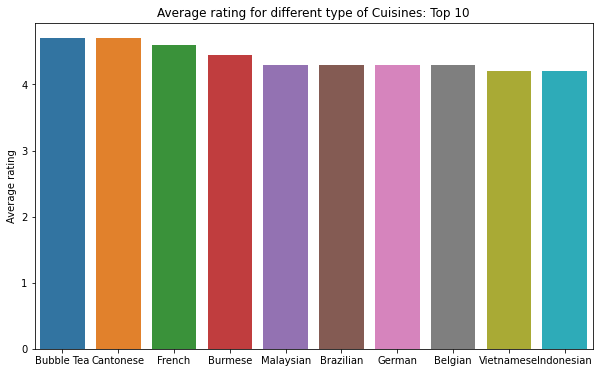

In [418]:
Old = RestaurantData.loc[RestaurantData.Rating != '-']
New = RestaurantData.loc[RestaurantData.Rating == '-']
Old.Rating = Old.Rating.astype(np.float64)
a = []
for n in category:
    X = Old.loc[Old[n] == 1]
    mean = np.mean(X.Rating)
    a.append(mean)
average_rating = pd.Series(a, index=category, name='Average rating')
average_rating = average_rating.sort_values(ascending=False)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average rating for different type of Cuisines: Top 10")
sns.barplot(x=average_rating.index[:10], y=average_rating[:10])

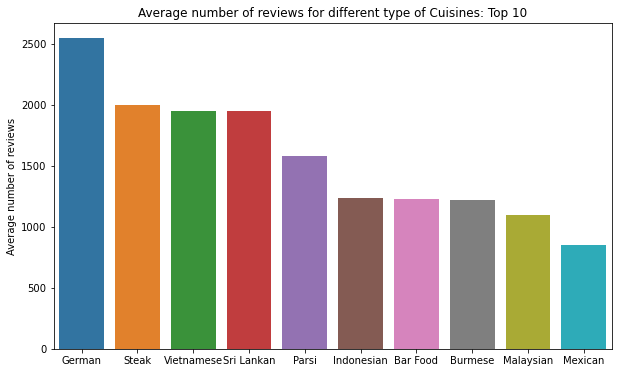

In [419]:
Old = RestaurantData.loc[RestaurantData.Rating != '-']
Old.Rating = Old.Rating.astype(np.float64)
a = []
for n in category:
    X = Old.loc[Old[n] == 1]
    mean = np.mean(X.Reviews)
    a.append(mean)
average_reviews = pd.Series(a, index=category, name='Average number of reviews')
average_reviews = average_reviews.sort_values(ascending=False)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average number of reviews for different type of Cuisines: Top 10")
sns.barplot(x=average_reviews.index[:10], y=average_reviews[:10])

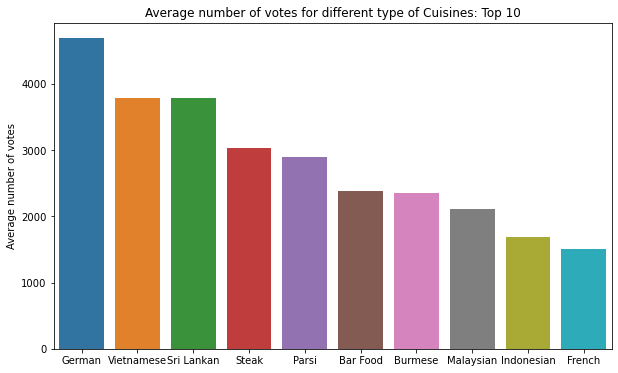

In [420]:
Old.Rating = Old.Rating.astype(np.float64)
a = []
for n in category:
    X = Old.loc[Old[n] == 1]
    mean = np.mean(X.Votes)
    a.append(mean)
average_votes = pd.Series(a, index=category, name='Average number of votes')
average_votes = average_votes.sort_values(ascending=False)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average number of votes for different type of Cuisines: Top 10")
sns.barplot(x=average_votes.index[:10], y=average_votes[:10])

Looking at all the 3 graphs, German, Vietnamese, Malaysian and Indonesian food are the most popular types of food with high ratings.

(1.2) Trending of food:  
What types of cuisines have the most number of restaurant

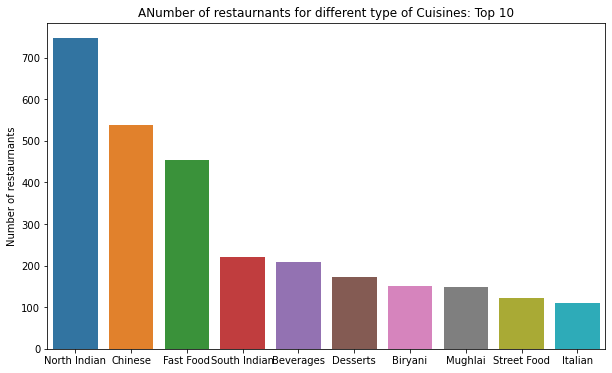

In [429]:
Old.Rating = Old.Rating.astype(np.float64)
a = []
for n in category:
    X = Old.loc[Old[n] == 1]
    c = X.shape[0]
    a.append(c)
count = pd.Series(a, index=category, name='Number of restaurnants')
count = count.sort_values(ascending=False)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("ANumber of restaurnants for different type of Cuisines: Top 10")
sns.barplot(x=count.index[:10], y=count[:10])

North Indian, Chinese and Fast food are top 3 types based on the total number.

(2) Rating prediction for restaurants without rating based on restaurant info

In [421]:
Old_total = Old.drop(columns=['Restaurant','Cuisines'])
Old_y = Old['Rating']
Old_x = Old.drop(columns=['Restaurant','Cuisines', 'Rating'])
New_y = New['Rating']
New_x = New.drop(columns=['Restaurant','Cuisines', 'Rating'])

# Model 1: random forest
rf0 = RandomForestRegressor(oob_score=True, random_state=20)  
rf0.fit(Old_x,Old_y)  
# print(rf0.oob_score_)
y_predict0 = rf0.predict(New_x)

# Model 2: decision tree
rf1 = DecisionTreeRegressor()
rf1.fit(Old_x,Old_y)
y_predict1 = rf1.predict(New_x)


(3) Estimating average cost based on restaurant info

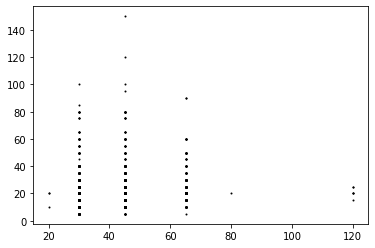

In [446]:
plt.scatter(Old['Cook_Time'], Old['Average_Cost'],  color='black',s = 1)

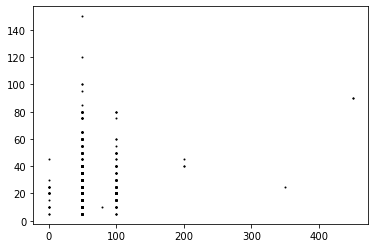

In [447]:
plt.scatter(Old['Minimum_Order'], Old['Average_Cost'],  color='black',s = 1)

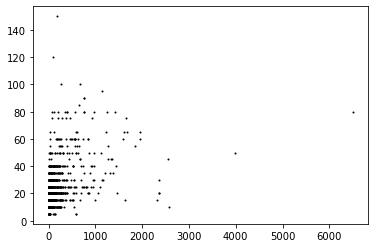

In [448]:
plt.scatter(Old['Reviews'], Old['Average_Cost'],  color='black',s = 1)

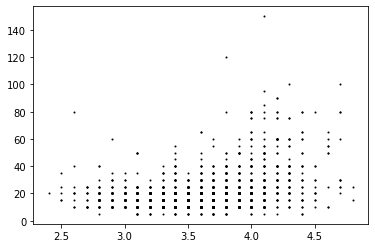

In [449]:
plt.scatter(Old['Rating'], Old['Average_Cost'],  color='black',s = 1)

Leverage a linear regression to conduct estimation:

In [452]:
Old.Rating = Old.Rating.astype(np.float64)
est = smf.ols(formula='Average_Cost ~ Cook_Time + Minimum_Order + Reviews + Rating', data=Old).fit() #方法二
print(est.summary()) #回归结果
print(est.params) #系数

                            OLS Regression Results                            
Dep. Variable:           Average_Cost   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          8.58e-101
Time:                        20:37:10   Log-Likelihood:                -6499.5
No. Observations:                1666   AIC:                         1.301e+04
Df Residuals:                    1661   BIC:                         1.304e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -12.2443      2.878     -4.254

Clearly, all of the listed variable here will affect the average_cost. Within which, restaurants with higher rating, more reviews, longer cook_time tend to have higher average_cost.  
Note: here we delete the votes variable since it is high correlated to the reviews variable.

(4.1) Clustering restaurant locations to figure out the optimized FoodieX pick up zones for all the food

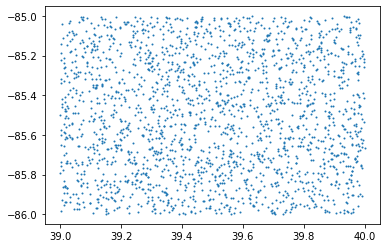

In [440]:
#location of different restaurant
RestaurantData_new = RestaurantData
plt.scatter(RestaurantData_new.Latitude,RestaurantData_new.Longitude, s=1)

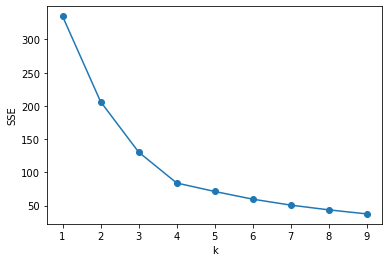

In [441]:
# choose k
SSE = []  
maxk = 10
for k in range(1, maxk):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(RestaurantData_new[['Latitude','Longitude']])
    SSE.append(estimator.inertia_)
X = range(1, maxk)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()


Let's choose k = 4

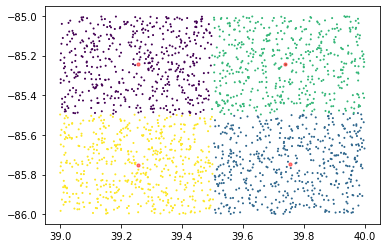

In [442]:
X = RestaurantData_new[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=1, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5);

In [444]:
centers

array([[ 39.25445509, -85.243424  ],
       [ 39.75444964, -85.74757003],
       [ 39.73852967, -85.2450088 ],
       [ 39.25411879, -85.75043999]])

(4.2) Clustering restaurant locations to figure out the optimized FoodieX pick up zones for "Street Food"

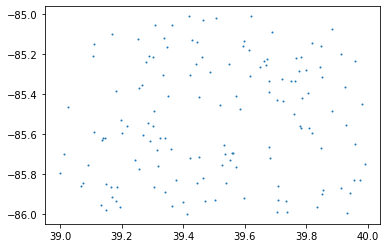

In [435]:
#location of different restaurant
RestaurantData_new = RestaurantData.loc[RestaurantData['Street Food'] == 1]
plt.scatter(RestaurantData_new.Latitude,RestaurantData_new.Longitude, s=1)

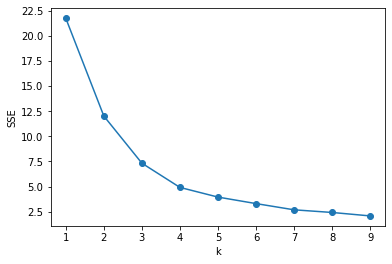

In [437]:
# choose k
SSE = []  
maxk = 10
for k in range(1, maxk):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(RestaurantData_new[['Latitude','Longitude']])
    SSE.append(estimator.inertia_)
X = range(1, maxk)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()


Let's choose k = 4

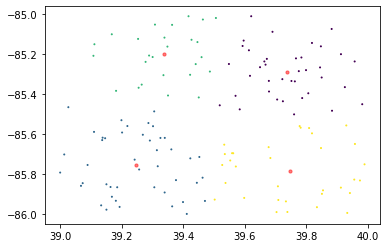

In [439]:
X = RestaurantData_new[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=1, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5);

In [209]:
centers

array([[ 39.75153974, -85.75391188],
       [ 39.25596266, -85.24252834],
       [ 39.74228255, -85.25142658],
       [ 39.25316086, -85.74962225]])